In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

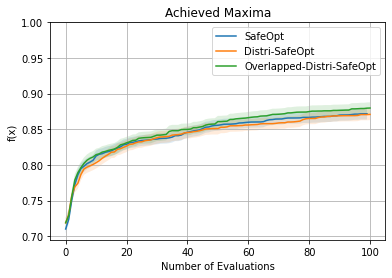

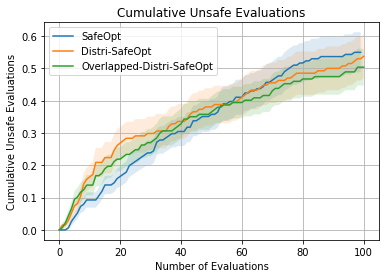

In [3]:
# read SBO files
sbo_achieved_max = pd.read_csv("./data/sbo/08_Apr_2022_02_17_31_gp_sample_sbo_achieved_max.csv")
sbo_unsafe_evals = pd.read_csv("./data/sbo/08_Apr_2022_02_17_31_gp_sample_sbo_cumu_unsafe_evals.csv")

# read DBO files
dbo_files = glob.glob("./data/dbo/*")
y_scaled = []
y_unsafe = []
for file in dbo_files:
    dbo = pd.read_csv(file)
    y_scaled.append(dbo.y_scaled)
    y_unsafe.append(dbo.y_unsafe)
dbo_scaled = pd.concat(y_scaled, axis=1)
dbo_unsafe = pd.concat(y_unsafe, axis=1)
dbo_scaled.set_axis(labels=list(range(len(y_scaled))), axis="columns", inplace=True)
dbo_unsafe.set_axis(labels=list(range(len(y_unsafe))), axis="columns", inplace=True)

# read DBO_OVR files
dbo_ovr_files = glob.glob("./data/dbo_ovr/*")
y_scaled = []
y_unsafe = []
for file in dbo_ovr_files:
    dbo_ovr = pd.read_csv(file)
    y_scaled.append(dbo_ovr.y_scaled)
    y_unsafe.append(dbo_ovr.y_unsafe)
dbo_ovr_scaled = pd.concat(y_scaled, axis=1)
dbo_ovr_unsafe = pd.concat(y_unsafe, axis=1)
dbo_ovr_scaled.set_axis(labels=list(range(len(y_scaled))), axis="columns", inplace=True)
dbo_ovr_unsafe.set_axis(labels=list(range(len(y_unsafe))), axis="columns", inplace=True)


# plotting achieved maxima 
# plt.figure(figsize=(15,10))
# sbo
achieved_max = sbo_achieved_max.cummax()
achieved_max_mean = achieved_max.mean(axis=1)
achieved_max_std = achieved_max.std(axis=1)
plt.plot(achieved_max_mean, label="SafeOpt")
plt.fill_between(
    list(range(achieved_max_mean.size)),
    achieved_max_mean-achieved_max_std/np.sqrt(achieved_max.shape[1]),
    achieved_max_mean+achieved_max_std/np.sqrt(achieved_max.shape[1]),
    alpha=0.15
)

# dbo
achieved_max = dbo_scaled.cummax()
achieved_max_mean = achieved_max.mean(axis=1)
achieved_max_std = achieved_max.std(axis=1)
plt.plot(achieved_max_mean, label="Distri-SafeOpt")
plt.fill_between(
    list(range(achieved_max_mean.size)),
    achieved_max_mean-achieved_max_std/np.sqrt(achieved_max.shape[1]),
    achieved_max_mean+achieved_max_std/np.sqrt(achieved_max.shape[1]),
    alpha=0.15
)

# dbo_ovr
achieved_max = dbo_ovr_scaled.cummax()
achieved_max_mean = achieved_max.mean(axis=1)
achieved_max_std = achieved_max.std(axis=1)
plt.plot(achieved_max_mean, label="Overlapped-Distri-SafeOpt")
plt.fill_between(
    list(range(achieved_max_mean.size)),
    achieved_max_mean-achieved_max_std/np.sqrt(achieved_max.shape[1]),
    achieved_max_mean+achieved_max_std/np.sqrt(achieved_max.shape[1]),
    alpha=0.15
)
plt.xlabel("Number of Evaluations")
plt.ylabel("f(x)")
plt.title("Achieved Maxima")
plt.ylim([None, 1])
plt.grid()
plt.legend()
plt.savefig("./gp-sample-maxima.pdf", format="pdf")
plt.show()


# plotting cumulative unsafe evaluations
# sbo
unsafe_eval = sbo_unsafe_evals.cumsum()
unsafe_eval_mean = unsafe_eval.mean(axis=1)
unsafe_eval_std = unsafe_eval.std(axis=1)
plt.plot(unsafe_eval_mean, label="SafeOpt")
plt.fill_between(
    list(range(unsafe_eval_mean.size)),
    (unsafe_eval_mean-unsafe_eval_std/np.sqrt(unsafe_eval.shape[1])).clip(lower=0),
    (unsafe_eval_mean+unsafe_eval_std/np.sqrt(unsafe_eval.shape[1])),
    alpha=0.15
)

# dbo
unsafe_eval = dbo_unsafe.cumsum()
unsafe_eval_mean = unsafe_eval.mean(axis=1)
unsafe_eval_std = unsafe_eval.std(axis=1)
plt.plot(unsafe_eval_mean, label="Distri-SafeOpt")
plt.fill_between(
    list(range(unsafe_eval_mean.size)),
    (unsafe_eval_mean-unsafe_eval_std/np.sqrt(unsafe_eval.shape[1])).clip(lower=0),
    (unsafe_eval_mean+unsafe_eval_std/np.sqrt(unsafe_eval.shape[1])),
    alpha=0.15
)

# dbo_ovr
unsafe_eval = dbo_ovr_unsafe.cumsum()
unsafe_eval_mean = unsafe_eval.mean(axis=1)
unsafe_eval_std = unsafe_eval.std(axis=1)
plt.plot(unsafe_eval_mean, label="Overlapped-Distri-SafeOpt")
plt.fill_between(
    list(range(unsafe_eval_mean.size)),
    (unsafe_eval_mean-unsafe_eval_std/np.sqrt(unsafe_eval.shape[1])).clip(lower=0),
    (unsafe_eval_mean+unsafe_eval_std/np.sqrt(unsafe_eval.shape[1])),
    alpha=0.15
)

plt.grid()
plt.xlabel("Number of Evaluations")
plt.ylabel("Cumulative Unsafe Evaluations")
plt.title("Cumulative Unsafe Evaluations")
plt.legend()
plt.savefig("./gp-sample-unsafe.pdf", format="pdf")
plt.show()